In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
import os
path = os.getcwd() + '/ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])

Ex. 1. Use the head and describe function to examine the data and display few columns.

Ex. 2. Plot and analyze the data, where: x - population, y - profit.

Ex. 3. In order to make this cost function work we need to insert a column of 1s at the beginning of the data frame.

In [55]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [56]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


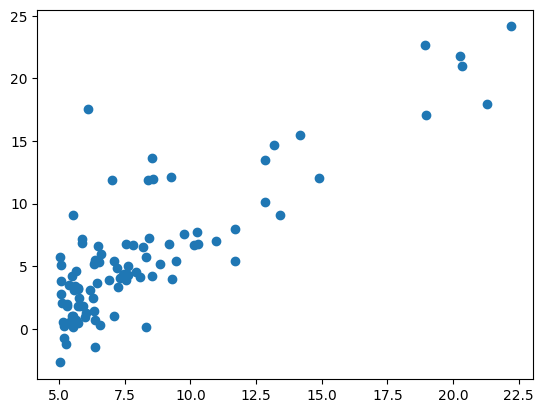

In [57]:
plt.scatter(data['Population'], data['Profit'])
plt.show()

In [58]:
data.insert(0, '1s', [1]*data.shape[0])
data.head()

,1s,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


Ex 4. We need to separate our data into independent variables X (column 0,1) and our dependent variable y (col. 2). Check with the head function if your implementation is correct:

```
X = 
Y =
```

 Finally, we’re going to convert our data frames to numpy matrices and instantiate a parameter matirx. We also need to initialise parameter 
θ
.



In [59]:
X = data[["1s", "Population"]]
X.head()

,1s,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [60]:
y = data[['Profit']]
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [61]:
X = np.matrix(X.values)
y = np.matrix(y.values)
theta = np.zeros((X.shape[1], 1))
print(theta)

[[0.]
 [0.]]


Ex. 5
The goal of linear regression is to find a straight line which accurately represents the relationship between population and profit. This is called the hypothesis function and it’s formulated as 𝑓(𝑥)→𝐑:

f
(
x
)
=
θ
0
+
θ
1
x
1
+
θ
2
x
2
+
…
θ
n
x
n
  
(1)
 
where 
x
∈
R
N
 corresponds to the feature matrix and 
θ
∈
R
N
 corresponds to the vector of model parameters. Parameters 
θ
 are the values that we will adjust to minimize the cost function.

The objective in training a linear regression model is to minimize a cost function, which measures the difference between actual 
y
 values in the training sample and predictions made by the hypothesis function:
J
(
θ
)
=
1
2
m
m
∑
i
=
1
 
(
f
(
x
i
)
−
y
i
)
2


Ex. 6 The cost function evaluates the quality of our model by calculating the error between our model’s prediction for a data point, using the model parameters, and the actual data point. Please write the cost function based on 
X
,
y
 and parameter 
θ
.

Ex. 7 Test the cost function with (
θ
=
0
).

In [63]:
def computeCost(x, y, theta):
    return 1 / (2 * x.shape[0]) * np.sum(np.square(x * theta - y)) 

In [64]:
computeCost(X, y, theta)

32.072733877455676

### Gradient descent

Ex. 8 Please implement the gradient descent algorithm:
the function returns optimized values 
θ
 and a vector of the cost function value for each iteration

In [65]:
def gradient_prosty(x, y, theta, alpha, iterations):
    cost = []
    for _ in range(0, iterations):
        theta = theta - (1/len(y)) * alpha * np.transpose(x) * (x * theta - y)
        cost.append(computeCost(x, y, theta))
 
    return theta, cost

In [66]:
alpha = 0.01
it = 1000

Ex. 9 Please calculate the optimal parameters for the dataset.

Ex. 10 Please calculate the cost function for the given (zad.8) 
θ
.

Ex. 11 Plot the regression function and our dataset.

Ex. 12 Plot the relationship between the cost function and number of iterations.

In [67]:
theta, cost = gradient_prosty(X, y, theta, alpha, it)

In [68]:
theta # optimal coefficients

matrix([[-3.24140214],
        [ 1.1272942 ]])

In [69]:
cost[-1] # cost from last iteration

4.515955503078914

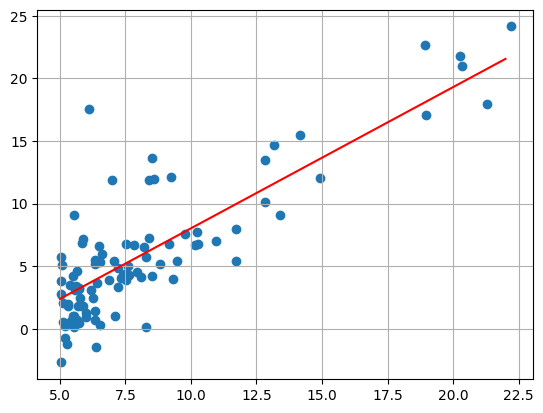

In [70]:
# y = ax + b
xx = np.arange(5,23)
a = theta.flat[1]
b = theta.flat[0]
plt.scatter(data['Population'], data['Profit'])
plt.plot(xx, a * xx + b, 'r')
plt.grid()
plt.show()

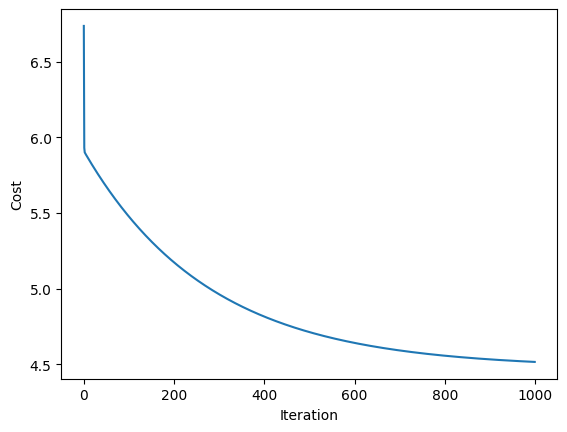

In [71]:
plt.figure()
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.plot(range(len(cost)), cost)
plt.show()

# Linear regression with multiple variables

Skipped descriptions to be short

In [72]:
path = os.getcwd() + '/ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

FileNotFoundError: [Errno 2] No such file or directory: 'c:\\Users\\Motyl\\OneDrive\\Pulpit\\Studies\\sem6\\UM\\ML2021/ex1data2.txt'

In [ ]:
data2.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


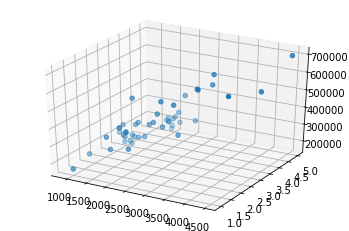

In [ ]:
ax = plt.axes(projection ='3d') 
ax.scatter(data2.Size, data2.Bedrooms, data2.Price)

In [ ]:
# feature normalization
for column in data2:
    data2[column] = (data2[column] - data2[column].mean()) / data2[column].std()

data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


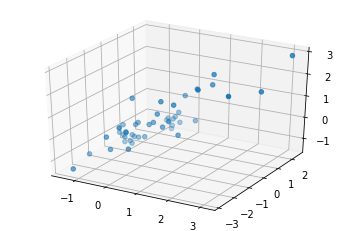

In [ ]:
ax = plt.axes(projection ='3d') 
ax.scatter(data2.Size, data2.Bedrooms, data2.Price)

In [ ]:
data2.insert(0, '1s', [1]*data2.shape[0])
data2.head()

,1s,Size,Bedrooms,Price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


In [ ]:
X = data2[['1s', 'Size', 'Bedrooms']]
X.head()

,1s,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [ ]:
Y = data2[['Price']]
Y.head()

,Price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389


In [ ]:
X = np.matrix(X.values)
Y = np.matrix(Y.values)
Theta = np.zeros((X.shape[1], 1))

In [ ]:
computeCost(X, Y, Theta)

0.4893617021276596

In [ ]:
Alpha = 0.01
It = 1000
theta, cost = gradient_prosty(X, Y, Theta, Alpha, It)

In [ ]:
theta

matrix([[-1.11029079e-16],
        [ 8.78503652e-01],
        [-4.69166570e-02]])

In [ ]:
cost[-1]

0.13070336960771892

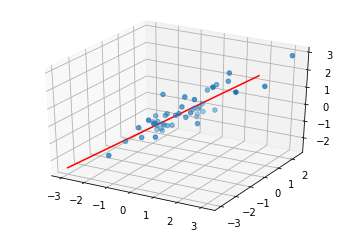

In [ ]:
xx = np.arange(-3, 3)
yy = np.arange(-3, 3)

ax = plt.axes(projection ='3d')  
ax.scatter(data2.Size, data2.Bedrooms, data2.Price)
ax.plot(xx, yy, theta.flat[0] + theta.flat[1] * xx + theta.flat[2] * yy, 'r')

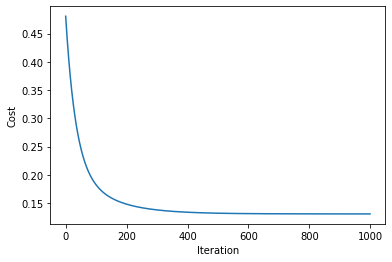

In [ ]:
plt.figure()
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.plot(range(len(cost)), cost)
plt.show()

# Boston

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model as linm
 
# Regression models
# http://scikit-learn.org/stable/modules/linear_model.html
 
# Load the diabetes dataset
boston = datasets.load_boston()
# print description
print(boston.DESCR)
# get the data
boston_X = boston.data
boston_Y = boston.target

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

#### Ex 1, 2

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Ex. 1. Divide the database into training and testing.
X_train, X_test, Y_train, Y_test = train_test_split(boston_X, boston_Y, test_size = 0.3)

# Ex. 2
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)

Y_predicted = regr.predict(X_test)

print('Coefficients: \n', regr.coef_)

Coefficients: 
 [-1.35224731e-01  5.38753656e-02  2.52047460e-02  4.84188221e+00
 -1.91051608e+01  4.11535687e+00 -1.00428517e-02 -1.66654230e+00
  2.76255735e-01 -7.96360976e-03 -6.56084370e-01  1.09200178e-02
 -5.93083346e-01]


In [ ]:
# MSE
mean_squared_error(Y_test, Y_predicted)

23.420513830709098

In [ ]:
# R^2
r2_score(Y_test, Y_predicted)

0.7044955529906252

#### Ex 3. Display plots

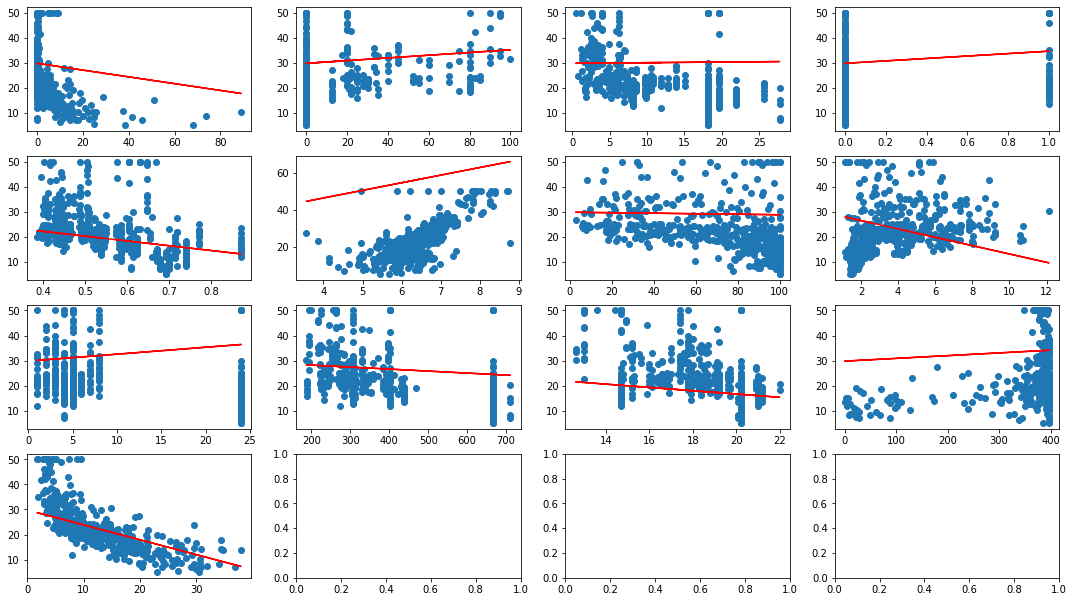

In [ ]:
# Made 16 subplots, but only 13 are used
fig, ax = plt.subplots(4, 4)
fig.set_size_inches(18, 10)
for i, axis in enumerate(ax.flat):
    if i > len(ax.flat):
        break
    axis.scatter(boston.data[:,i], boston.target)
    axis.plot(boston.data[:,i], boston.data[:,i] * regr.coef_[i] + regr.intercept_, 'r')

#### Ex 4 - compare models

In [ ]:
reg_LinReg =linm.LinearRegression().fit(X_train, Y_train)
reg_Ridge = linm.Ridge(alpha = .5).fit(X_train, Y_train)
reg_Lasso = linm.Lasso(alpha = 5.1).fit(X_train, Y_train)
reg_ElNet =linm.ElasticNet(alpha = .5, l1_ratio=0.5).fit(X_train, Y_train)

<BarContainer object of 4 artists>

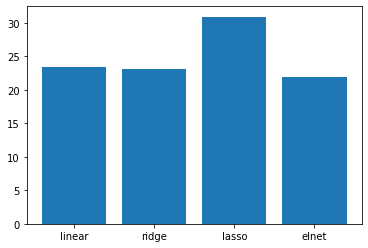

In [ ]:
errors = {}
Y_pred = reg_LinReg.predict(X_test)
errors['Linear'] = mean_squared_error(Y_test, Y_pred)
Y_pred = reg_Ridge.predict(X_test)
errors['Ridge'] = mean_squared_error(Y_test, Y_pred)
Y_pred = reg_Lasso.predict(X_test)
errors['Lasso'] = mean_squared_error(Y_test, Y_pred)
Y_pred = reg_ElNet.predict(X_test)
errors['ElNet'] = mean_squared_error(Y_test, Y_pred)
keys = errors.keys()
values = [errors[key] for key in keys]
plt.bar(keys, values)

Lasso has significantly higher error score than the others